In [1]:
include("main.jl")
using CairoMakie

In [6]:
histories = Dict(
    :Simple => load_history_from_json("json/dirichlet/history/Simple.json"),
    :Medium => load_history_from_json("json/dirichlet/history/Medium.json"),
    :None => load_history_from_json("json/dirichlet/history/None.json"),
    # :Softmax => load_jld("data/mcmc/history/SoftmaxPPL.jld"),
    # :SimplePPL => load_jld("data/mcmc/history/SimplePPL.jld"),
    :DQN => load_history_from_json("json/dqn/history/DQN.json"),
)

Dict{Symbol, HistoryType} with 4 entries:
  :None   => HistoryType(Dict(16=>[-0.663, -0.634, -0.6236, -0.6881, -0.6865, -…
  :Medium => HistoryType(Dict(16=>[-0.5974, -0.5614, -0.5156, -0.5595, -0.5253,…
  :DQN    => HistoryType(Dict(64=>[-0.55991, -0.61872, -0.61861], 16=>[-0.55729…
  :Simple => HistoryType(Dict(16=>[-0.383, -0.3707, -0.3729, -0.3825, -0.3454, …

In [2]:
runs = Dict(
    :Softmax => [load_jld("data/mcmc/runs/history-SoftmaxPPL-$i.jld")  for i in 1:10],
    :SimplePPL => [load_jld("data/mcmc/runs/history-SimplePPL-$i.jld")  for i in 1:10]
)

Dict{Symbol, Vector{RunData}} with 2 entries:
  :Softmax   => [RunData("history-SoftmaxPPL-1", :Softmax, ModelData(DynamicCho…
  :SimplePPL => [RunData("history-SimplePPL-1", :SimplePPL, ModelData(DynamicCh…

In [3]:
mcmc_data = run_mcmc(runs[:SimplePPL][10].model, simple_functions, 200)

MCMCRun([-59491.632873058305, -59491.632873058305, -59491.632873058305, -59491.632873058305, -59479.54663136855, -59479.54663136855, -59479.54663136855, -59478.45928699212, -59478.45928699212, -59478.45928699212  …  -59446.14618972455, -59446.14618972455, -59446.14618972455, -59445.273928564944, -59447.96052579532, -59447.96052579532, -59450.63124672191, -59450.63124672191, -59450.63124672191, -59450.63124672191], 0.09066666666666649, Dict{Union{Pair{Symbol, Symbol}, Symbol}, Float64}[Dict((:bp => :vaso_withdrawal_effect) => 0.16079730935380102, (:bp => :abx_effect) => 0.273011512790756, (:hr => :abx_effect) => 0.375270598630601, (:o2 => :fluctuation) => 0.16402776162248836, (:o2 => :vent_effect) => 0.47429666884396754, (:bp => :vaso_effect) => 0.4302343746357452, (:glu => :vaso_effect) => 0.3170985966034845, (:glu => :vaso_withdrawal_effect) => 0.07240544053843596, (:o2 => :vent_withdrawal_effect) => 0.056942860331673624, (:hr => :fluctuation) => 0.16151384905835356…), Dict((:bp => :v

In [4]:
m, p = evaluate_mcmc(mcmc_data, simple_functions)

(-0.38173, Dict{State, Action}(State(HIGH, NORMAL, NORMAL, LOW, false, false, false, true) => Action(true, true, false), State(HIGH, NORMAL, LOW, NORMAL, true, true, true, false) => Action(true, false, true), State(NORMAL, NORMAL, LOW, SUPER_HIGH, false, false, false, false) => Action(true, true, true), State(HIGH, NORMAL, NORMAL, NORMAL, true, true, false, true) => Action(true, true, false), State(LOW, HIGH, NORMAL, SUPER_LOW, false, false, true, true) => Action(true, true, false), State(HIGH, HIGH, LOW, LOW, true, false, false, true) => Action(true, true, true), State(LOW, NORMAL, LOW, SUPER_LOW, false, false, false, true) => Action(true, true, true), State(NORMAL, HIGH, LOW, SUPER_HIGH, false, false, false, true) => Action(true, true, true), State(NORMAL, LOW, NORMAL, HIGH, false, true, false, false) => Action(false, false, false), State(HIGH, LOW, NORMAL, SUPER_LOW, false, true, false, false) => Action(true, true, true)…))

In [ ]:
simple_mean_reward_samples = Dict()
for (i, run) in enumerate(runs[:SimplePPL])
    simple_mean_reward_samples[i] = run.mean_rewards
end

HistoryType(Dict(0 => [-0.71058, -0.67234, -0.74801, -0.792, -0.61761, -0.75511, -0.62387, -0.77141, -0.6003, -0.41743], 15 => [-0.67034, -0.72675, -0.60316, -0.75373, -0.57427, -0.73699, -0.51692, -0.68573, -0.48129, -0.70319], 7 => [-0.68689, -0.80516, -0.69951, -0.65784, -0.5417, -0.77456, -0.67626, -0.7764, -0.50391, -0.53668], 63 => [-0.53871, -0.67406, -0.74305, -0.74363, -0.6344, -0.65368, -0.70221, -0.6983, -0.62347, -0.66043], 31 => [-0.60563, -0.77887, -0.62155, -0.81372, -0.61257, -0.64859, -0.30471, -0.76932, -0.51607, -0.77228], 1023 => [-0.61727, -0.66421, -0.653, -0.64099, -0.70555, -0.56538, -0.71933, -0.61739, -0.74496, -0.71281], 255 => [-0.64555, -0.73378, -0.6704, -0.70505, -0.55238, -0.64441, -0.74953, -0.72753, -0.64093, -0.66399], 3 => [-0.7186, -0.65565, -0.74262, -0.74303, -0.53186, -0.70063, -0.72606, -0.57596, -0.56781, -0.59753], 1 => [-0.70707, -0.6958, -0.71513, -0.78481, -0.70068, -0.71917, -0.59449, -0.63073, -0.73167, -0.53866]), "Softmax", Dict{Any, An

In [4]:
# using JSON3

# function save_ts_to_json(ts_instance::HistoryType, file_path::String)
#     json_data = Dict(
#         "mean_rewards" => ts_instance.mean_rewards,
#         "name" => ts_instance.name,
#         "info" => ts_instance.info
#     )
#     JSON3.write(file_path, json_data)
# end


In [5]:

# using PyCall
# sepsis_gym = pyimport("custom_sepsis")

# mean_rewards = Dict()
# for len in 1:100000000
#     if log2(len) % 1 != 0
#         continue
#     end
#     mean_rewards[len] = [sepsis_gym.train_dqn(sepsis_gym.true_env, len, len).evaluate_policy(100000) for _ in 1:3]
#     history = HistoryType(mean_rewards, "DQN", Dict("name" => "DQN"))
#     save_ts_to_json(history, "json/dqn/history/DQN.json")
# end


In [6]:
random_mean = -0.6662000000000002 # mean([sepsis_gym.evaluate_policy(sepsis_gym.random_policy(), 1000) for i in 1:100])

-0.6662000000000002

In [8]:
using CairoMakie
using Statistics

# Example: Assuming you have 5 different dictionaries stored in a list

function plot_histories(histories, window_size=1, labels=[:SimplePPL, :Softmax, :Simple, :Medium, :None, :DQN], x_lim=nothing)

    # Create a figure
    fig = Figure(resolution = (800, 600))
    ax = Axis(fig[1, 1], xscale=log10, xlabel = "History Size (Number of Episodes)", ylabel = "Mean Rewards Across 100'000 Episodes", title = "Mean Rewards for 10 Sample MDPs Conditioned on a History")

    # Define colors for each dataset

    # Plot each dataset
    for (i, type) in enumerate(labels)
        mean_rewards = histories[type].mean_rewards
        # Prepare data
        x_vals = sort(collect(keys(mean_rewards)))
        y_means = [mean(mean_rewards[x]) for x in x_vals]
        y_stds = [std(mean_rewards[x]) for x in x_vals]

        # Collect all (x, y) pairs for scatter
        scatter_x = []
        scatter_y = []
        for x in x_vals
            ys = mean_rewards[x]
            append!(scatter_x, fill(x, length(ys)))  # Repeat x for each y
            append!(scatter_y, ys)                  # Collect y values
        end

        smoothed_mean_rewards = moving_avg(y_means, window_size)
        smoothed_std_rewards = Float64.(moving_avg(y_stds, window_size))


        # Add scatter plot for all points
        scatter!(ax, scatter_x, scatter_y, color = (colors_dict[type], 0.2), label = label_dict[type])

        # Add error band (variance) at the mean points
        band!(ax, x_vals, smoothed_mean_rewards .- smoothed_std_rewards, smoothed_mean_rewards .+ smoothed_std_rewards, color = (colors_dict[type], 0.2), )

        # Add line for the mean points
        # lines!(ax, x_vals, smoothed_mean_rewards, color = colors_dict[type], label = label_dict[type])
    end
    if x_lim != nothing
        xlims!(ax, 1, x_lim)
    end

    # Add a legend
    axislegend(ax, position=(:right, :bottom))



    # Display the plot
    fig
end


plot_histories (generic function with 4 methods)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


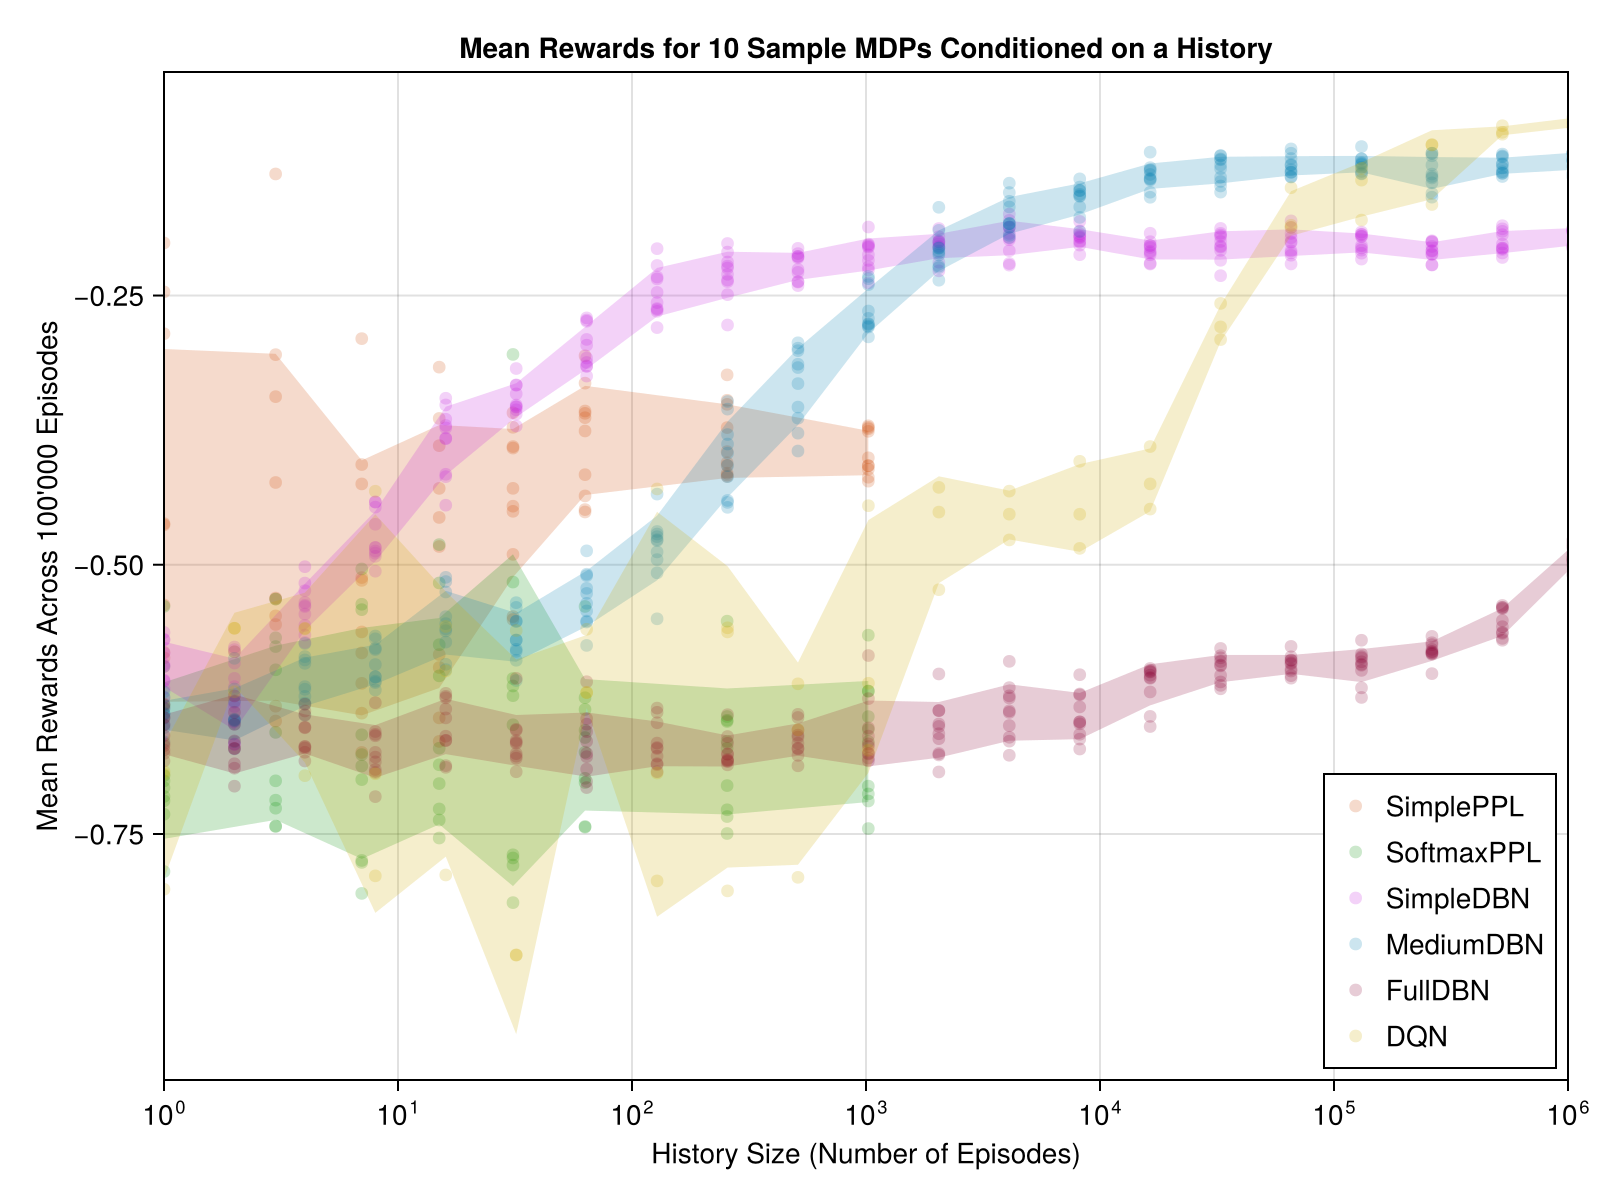

In [11]:
plot_histories(histories, 1, [:SimplePPL, :Softmax, :Simple, :Medium, :None, :DQN], 1000000)

In [18]:
function plot_scores(model)
    ks = sort(collect(keys(model.mcmcs)))
    fig = Figure()
    ax = Axis(fig[1, 1])

    # for k in ks
        lines!(ax, model.mcmcs[ks[end]].scores, label=string(ks[end]))
    # end

    axislegend(ax, position=(:right, :bottom))
    fig
    
end

plot_scores (generic function with 1 method)

In [17]:
finer = Dict(
    :Softmax => load_jld("data/mcmc/history/SoftmaxPPL-finer.jld"),
    :SimplePPL => load_jld("data/mcmc/history/SimplePPL-finer.jld"),
)

Dict{Symbol, PPHistoryRun} with 2 entries:
  :Softmax   => PPHistoryRun("SoftmaxPPL-finer", MCMCModel(:Softmax, DynamicCho…
  :SimplePPL => PPHistoryRun("SimplePPL-finer", MCMCModel(:SimplePPL, DynamicCh…

In [13]:
indices = [ 2,3,4,6,10,16,25,40,63,100]

10-element Vector{Int64}:
   2
   3
   4
   6
  10
  16
  25
  40
  63
 100

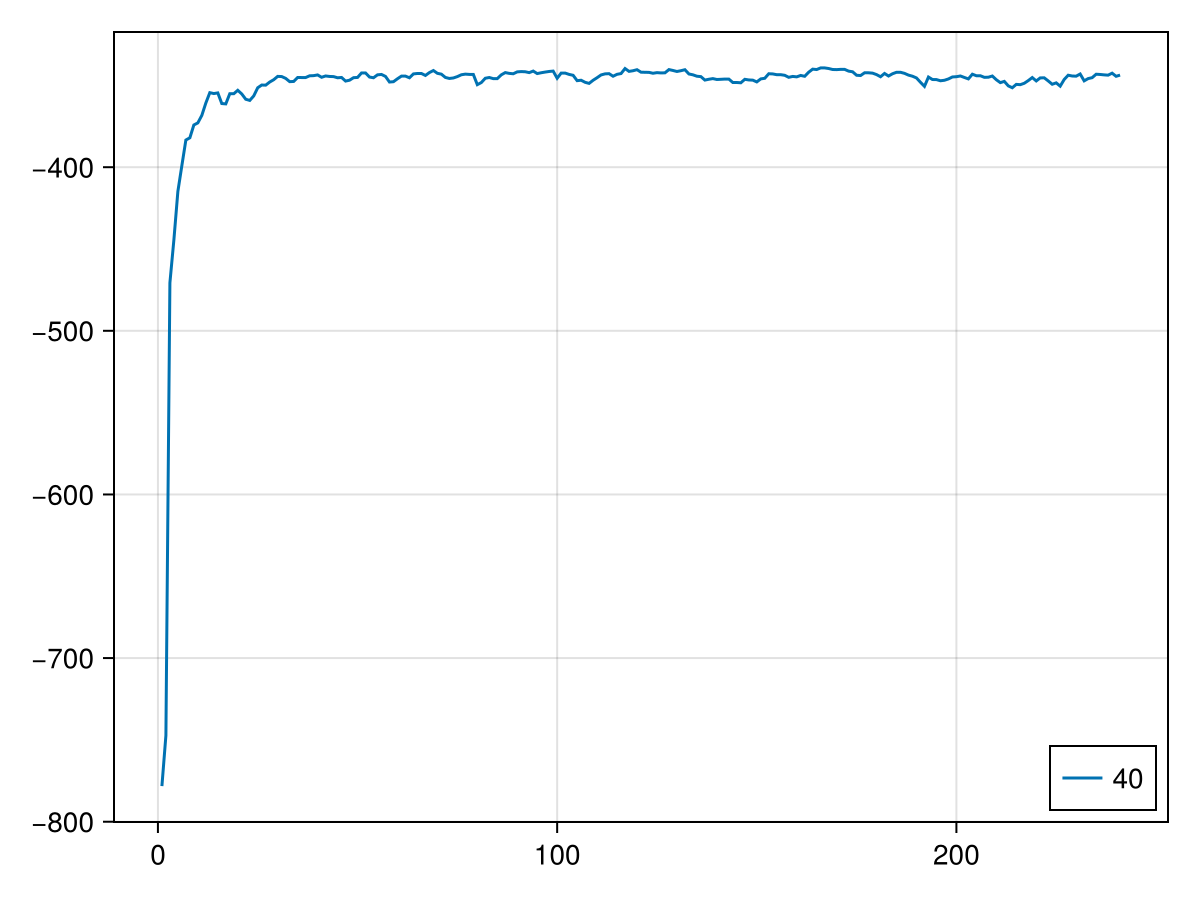

In [63]:
plot_scores(independent_histories[:SimplePPL][40][1])

In [64]:
independent = Dict(
    :SimplePPL => HistoryType(
        Dict(i => [model.mean_rewards[i][1] for model in independent_histories[:SimplePPL][i]] for i in indices),
        "SimplePPL",
        Dict("name" => "SimplePPL")
    ),
    :Softmax => HistoryType(
        Dict(i => [model.mean_rewards[i][1] for model in independent_histories[:Softmax][i]] for i in indices),
        "Softmax",
        Dict("name" => "Softmax")
    ))

Dict{Symbol, HistoryType} with 2 entries:
  :Softmax   => HistoryType(Dict(4=>[-0.77499, -0.77668, -0.76265, -0.46986, -0…
  :SimplePPL => HistoryType(Dict(4=>[-0.29426, -0.42784, -0.39149, -0.3767, -0.…

In [65]:
with_indep = Dict(
    :Simple => histories[:Simple],
    :Medium => histories[:Medium],
    :None => histories[:None],
    :SimplePPL => independent[:SimplePPL],
    :Softmax => independent[:Softmax],
)

Dict{Symbol, HistoryType} with 5 entries:
  :Softmax   => HistoryType(Dict(4=>[-0.77499, -0.77668, -0.76265, -0.46986, -0…
  :None      => HistoryType(Dict(16=>[-0.663, -0.634, -0.6236, -0.6881, -0.6865…
  :Medium    => HistoryType(Dict(16=>[-0.5974, -0.5614, -0.5156, -0.5595, -0.52…
  :SimplePPL => HistoryType(Dict(4=>[-0.29426, -0.42784, -0.39149, -0.3767, -0.…
  :Simple    => HistoryType(Dict(16=>[-0.383, -0.3707, -0.3729, -0.3825, -0.345…

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


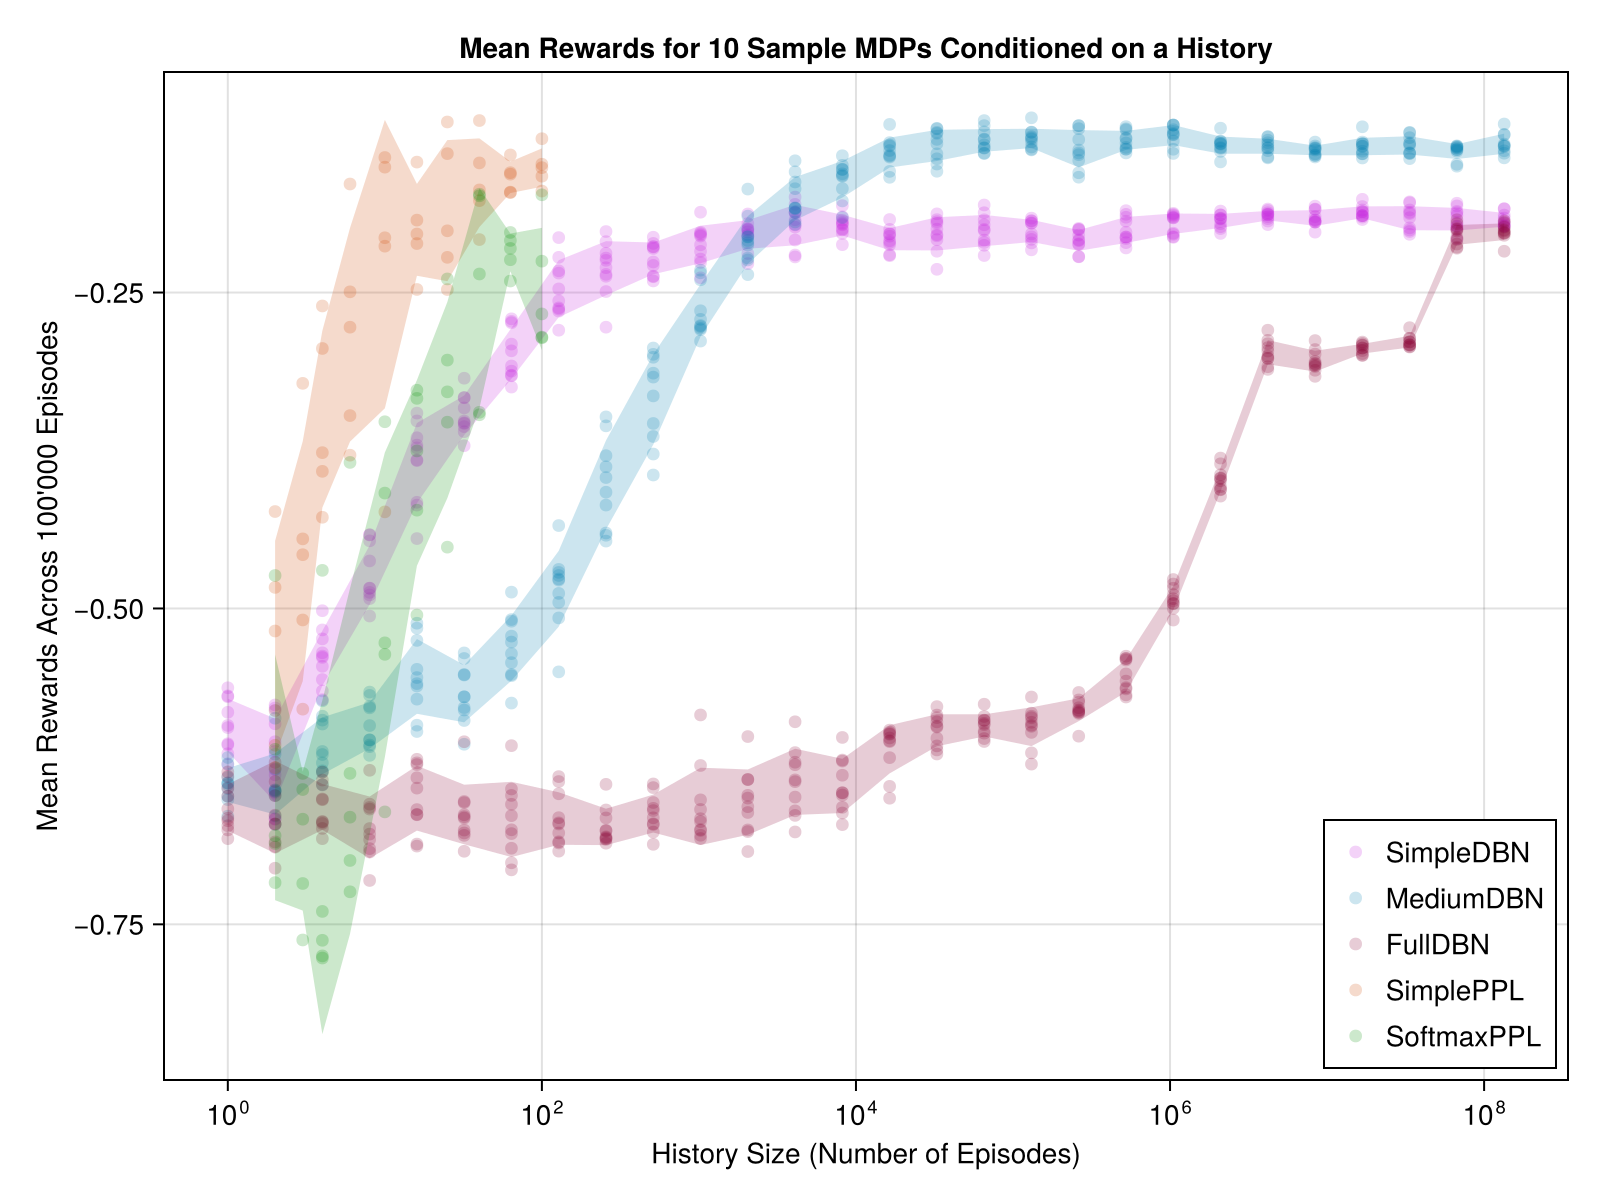

In [66]:
plot_histories(with_indep, 1, [:Simple, :Medium, :None, :SimplePPL, :Softmax])


15-element Vector{Int64}:
         1
         2
         4
         8
        16
        32
        64
       256
      1024
      4096
     16384
     65536
    262144
   1048576
 134217728

In [15]:
plot_scores(histories[:SimplePPL])

LoadError: UndefVarError: `plot_scores` not defined

In [14]:
using Gen
nested_view(histories[:SimplePPL].model.choices)[:episodes]

2049

In [64]:
maximum(keys(histories[:SimplePPL].policies))

2048

In [65]:
length(histories[:SimplePPL].model.policies)

2049

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


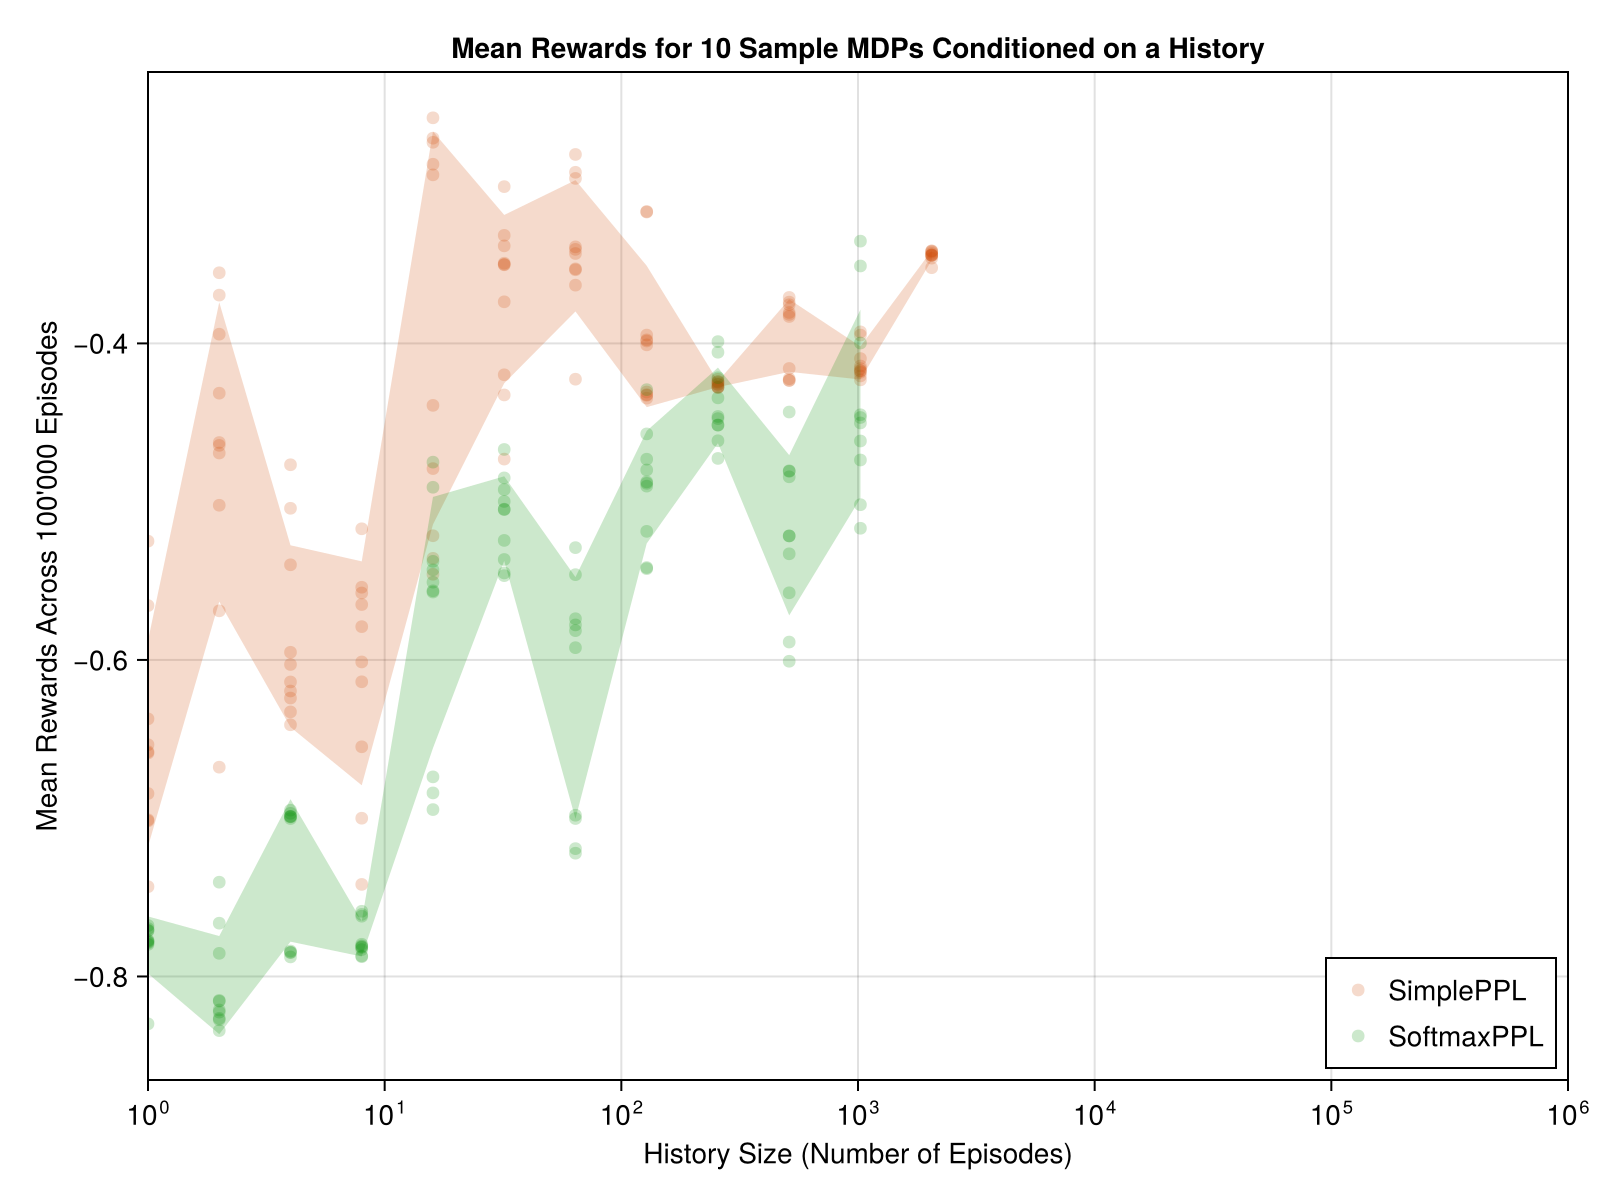

In [23]:
plot_histories(histories, 1, [:SimplePPL, :Softmax], 1000000)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


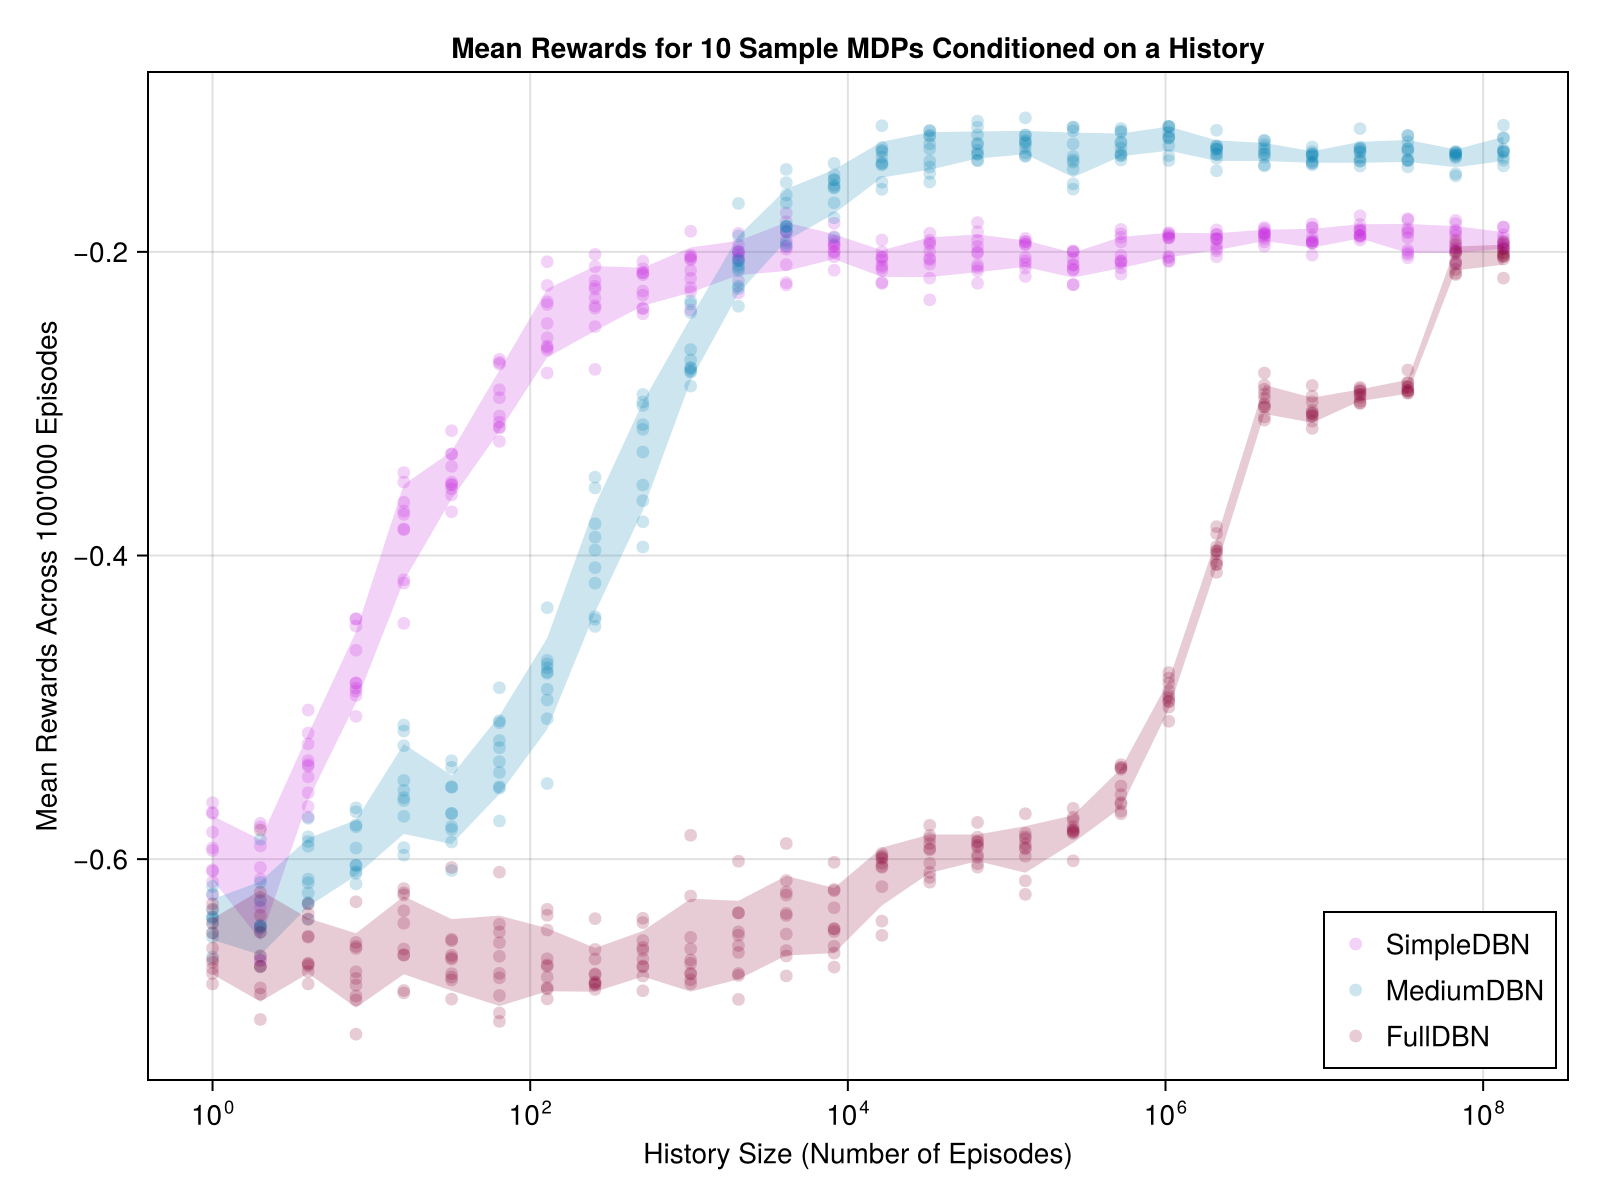

In [19]:
plot_histories(histories, 1, [:Simple, :Medium, :None])


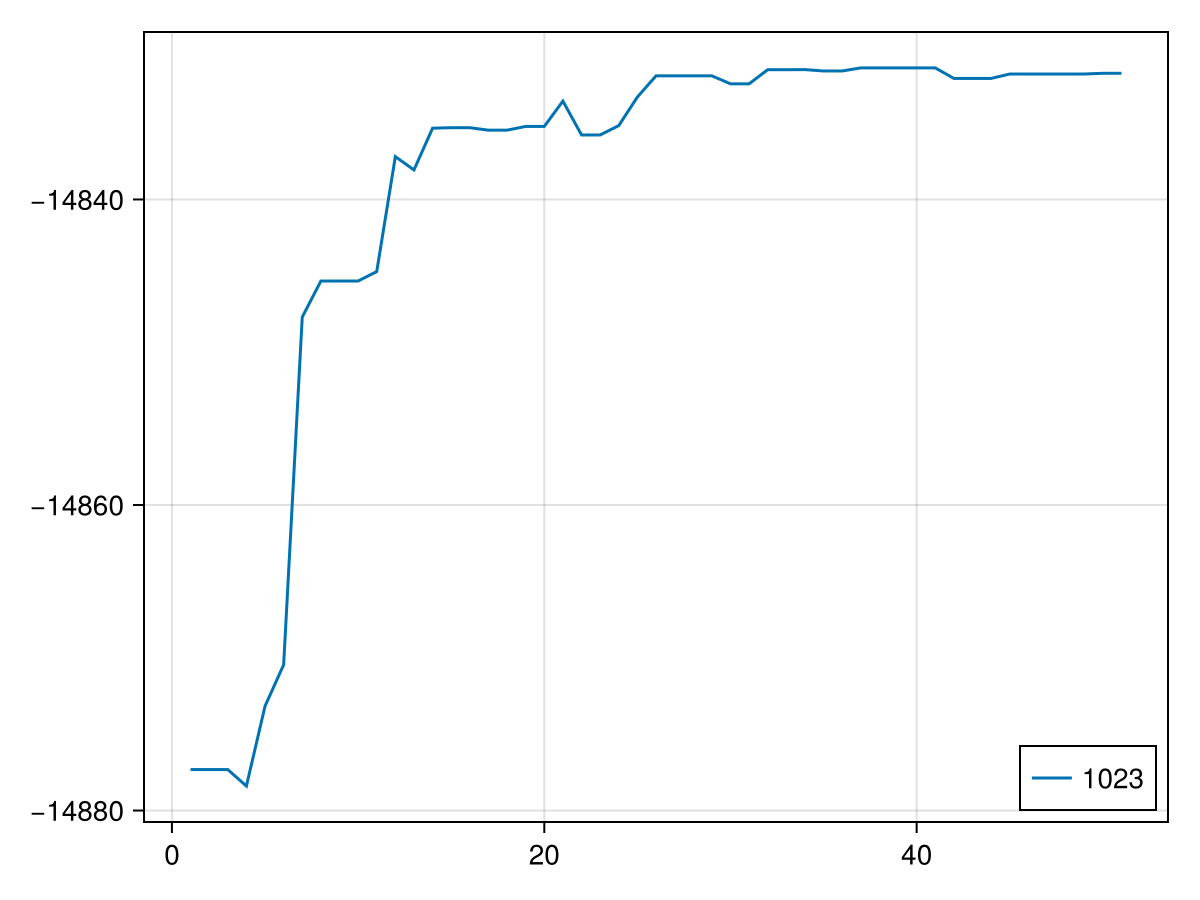

In [23]:
plot_scores(runs[:SimplePPL][7])